In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [4]:
img =  image.load_img("basedata/training/dogs/download (1).jpg")

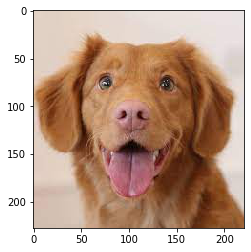

In [5]:
plt.imshow(img)

In [7]:
cv2.imread("basedata/training/dogs/download (1).jpg").shape

(228, 221, 3)

In [8]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [9]:
train_dataset = train.flow_from_directory("basedata/training/", target_size=(200,200), batch_size= 3, class_mode="binary")

Found 23 images belonging to 2 classes.


In [10]:
validation_dataset = validation.flow_from_directory("basedata/validation/", 
                                                    target_size=(200,200), 
                                                    batch_size= 3, class_mode="binary")

Found 14 images belonging to 2 classes.


In [12]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [16]:
model = tf.keras.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(200,200,3)),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512, activation="relu"),
                            tf.keras.layers.Dense(1, activation="sigmoid")
])
                                            

In [19]:
model.compile(loss="binary_crossentropy", optimizer ='adam', metrics=['accuracy'])

In [21]:
model_fit = model.fit(train_dataset, steps_per_epoch=3, epochs=30, validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 1s 518ms/step - loss: 0.6823 - accuracy: 0.6250 - val_loss: 0.6890 - val_accuracy: 0.4286
Epoch 2/30
3/3 [==============================] - 2s 528ms/step - loss: 0.5481 - accuracy: 0.8889 - val_loss: 0.9779 - val_accuracy: 0.4286
Epoch 3/30
3/3 [==============================] - 1s 498ms/step - loss: 0.5543 - accuracy: 0.7500 - val_loss: 1.1434 - val_accuracy: 0.4286
Epoch 4/30
3/3 [==============================] - 1s 510ms/step - loss: 0.6564 - accuracy: 0.7500 - val_loss: 0.8218 - val_accuracy: 0.4286
Epoch 5/30
3/3 [==============================] - 2s 550ms/step - loss: 0.4885 - accuracy: 0.7778 - val_loss: 0.7264 - val_accuracy: 0.4286
Epoch 6/30
3/3 [==============================] - 2s 518ms/step - loss: 0.5375 - accuracy: 0.7778 - val_loss: 0.7303 - val_accuracy: 0.4286
Epoch 7/30
3/3 [==============================] - 1s 517ms/step - loss: 0.4566 - accuracy: 0.7500 - val_loss: 0.9499 - val_accuracy: 0.4286
Epoch 8/30
3/3 [====

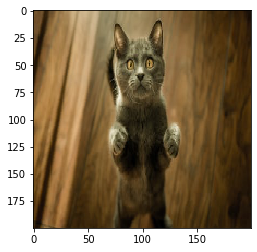

I am a dog


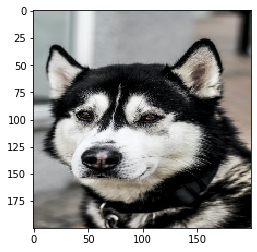

I am a cat


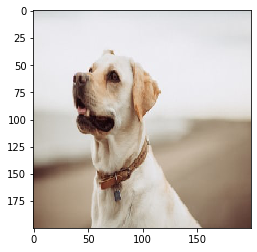

I am a dog


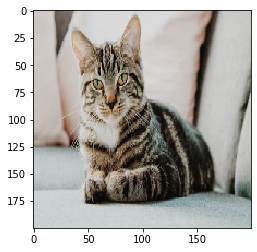

I am a cat


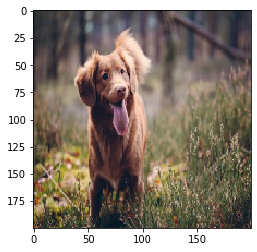

I am a cat


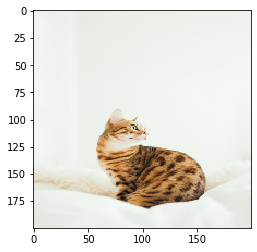

I am a dog


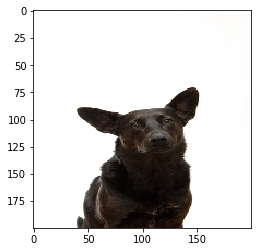

I am a cat


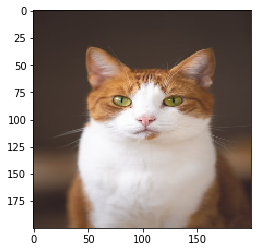

I am a dog


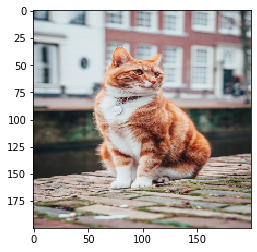

I am a cat


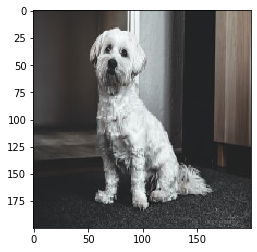

I am a cat


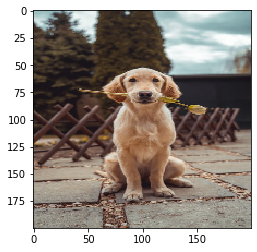

I am a dog


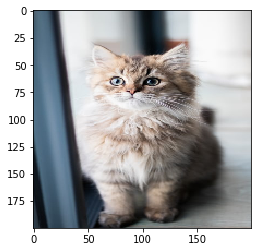

I am a dog


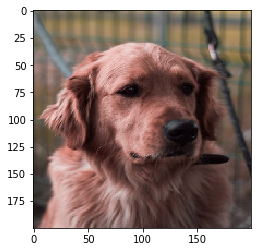

I am a dog


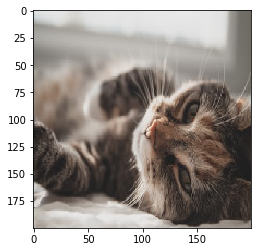

I am a dog


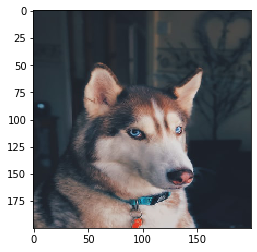

I am a dog


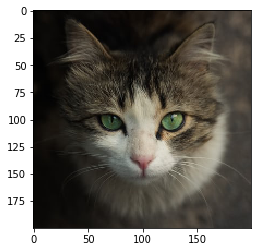

I am a dog


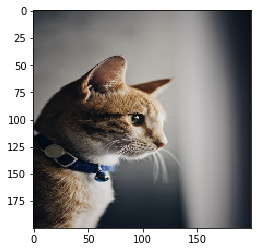

I am a dog


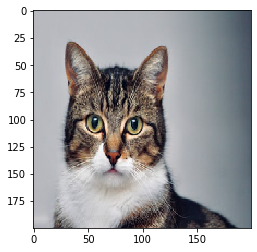

I am a cat


In [24]:
dir_path =  "basedata/testing"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"//"+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X =  image.img_to_array(img)
    X =  np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    
    if val==0:
        print("I am a cat")
    else:
        print("I am a dog")